Cloning into 'Clinical-Decision-Support-System-Healthcare-EPICS-project'...
remote: Enumerating objects: 295, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 295 (delta 56), reused 0 (delta 0), pack-reused 158
Receiving objects: 100% (295/295), 24.08 MiB | 16.68 MiB/s, done.
Resolving deltas: 100% (189/189), done.
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Outcome  
0                     0.627        1  
1                     0.351        0  
2                     0.672        1  
3                     0.

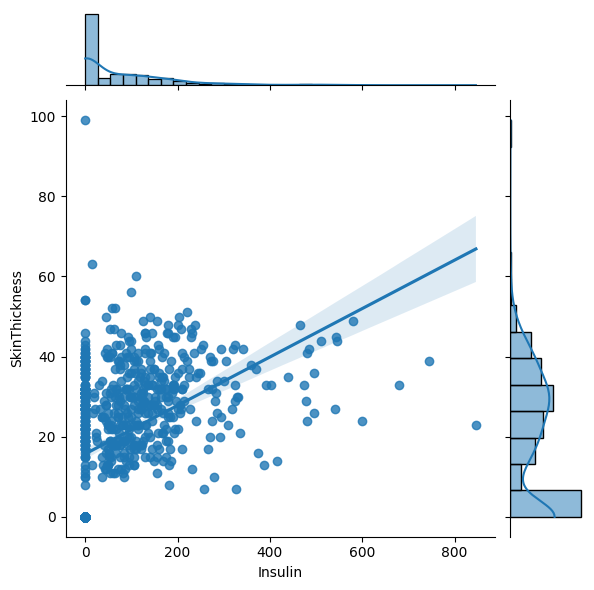

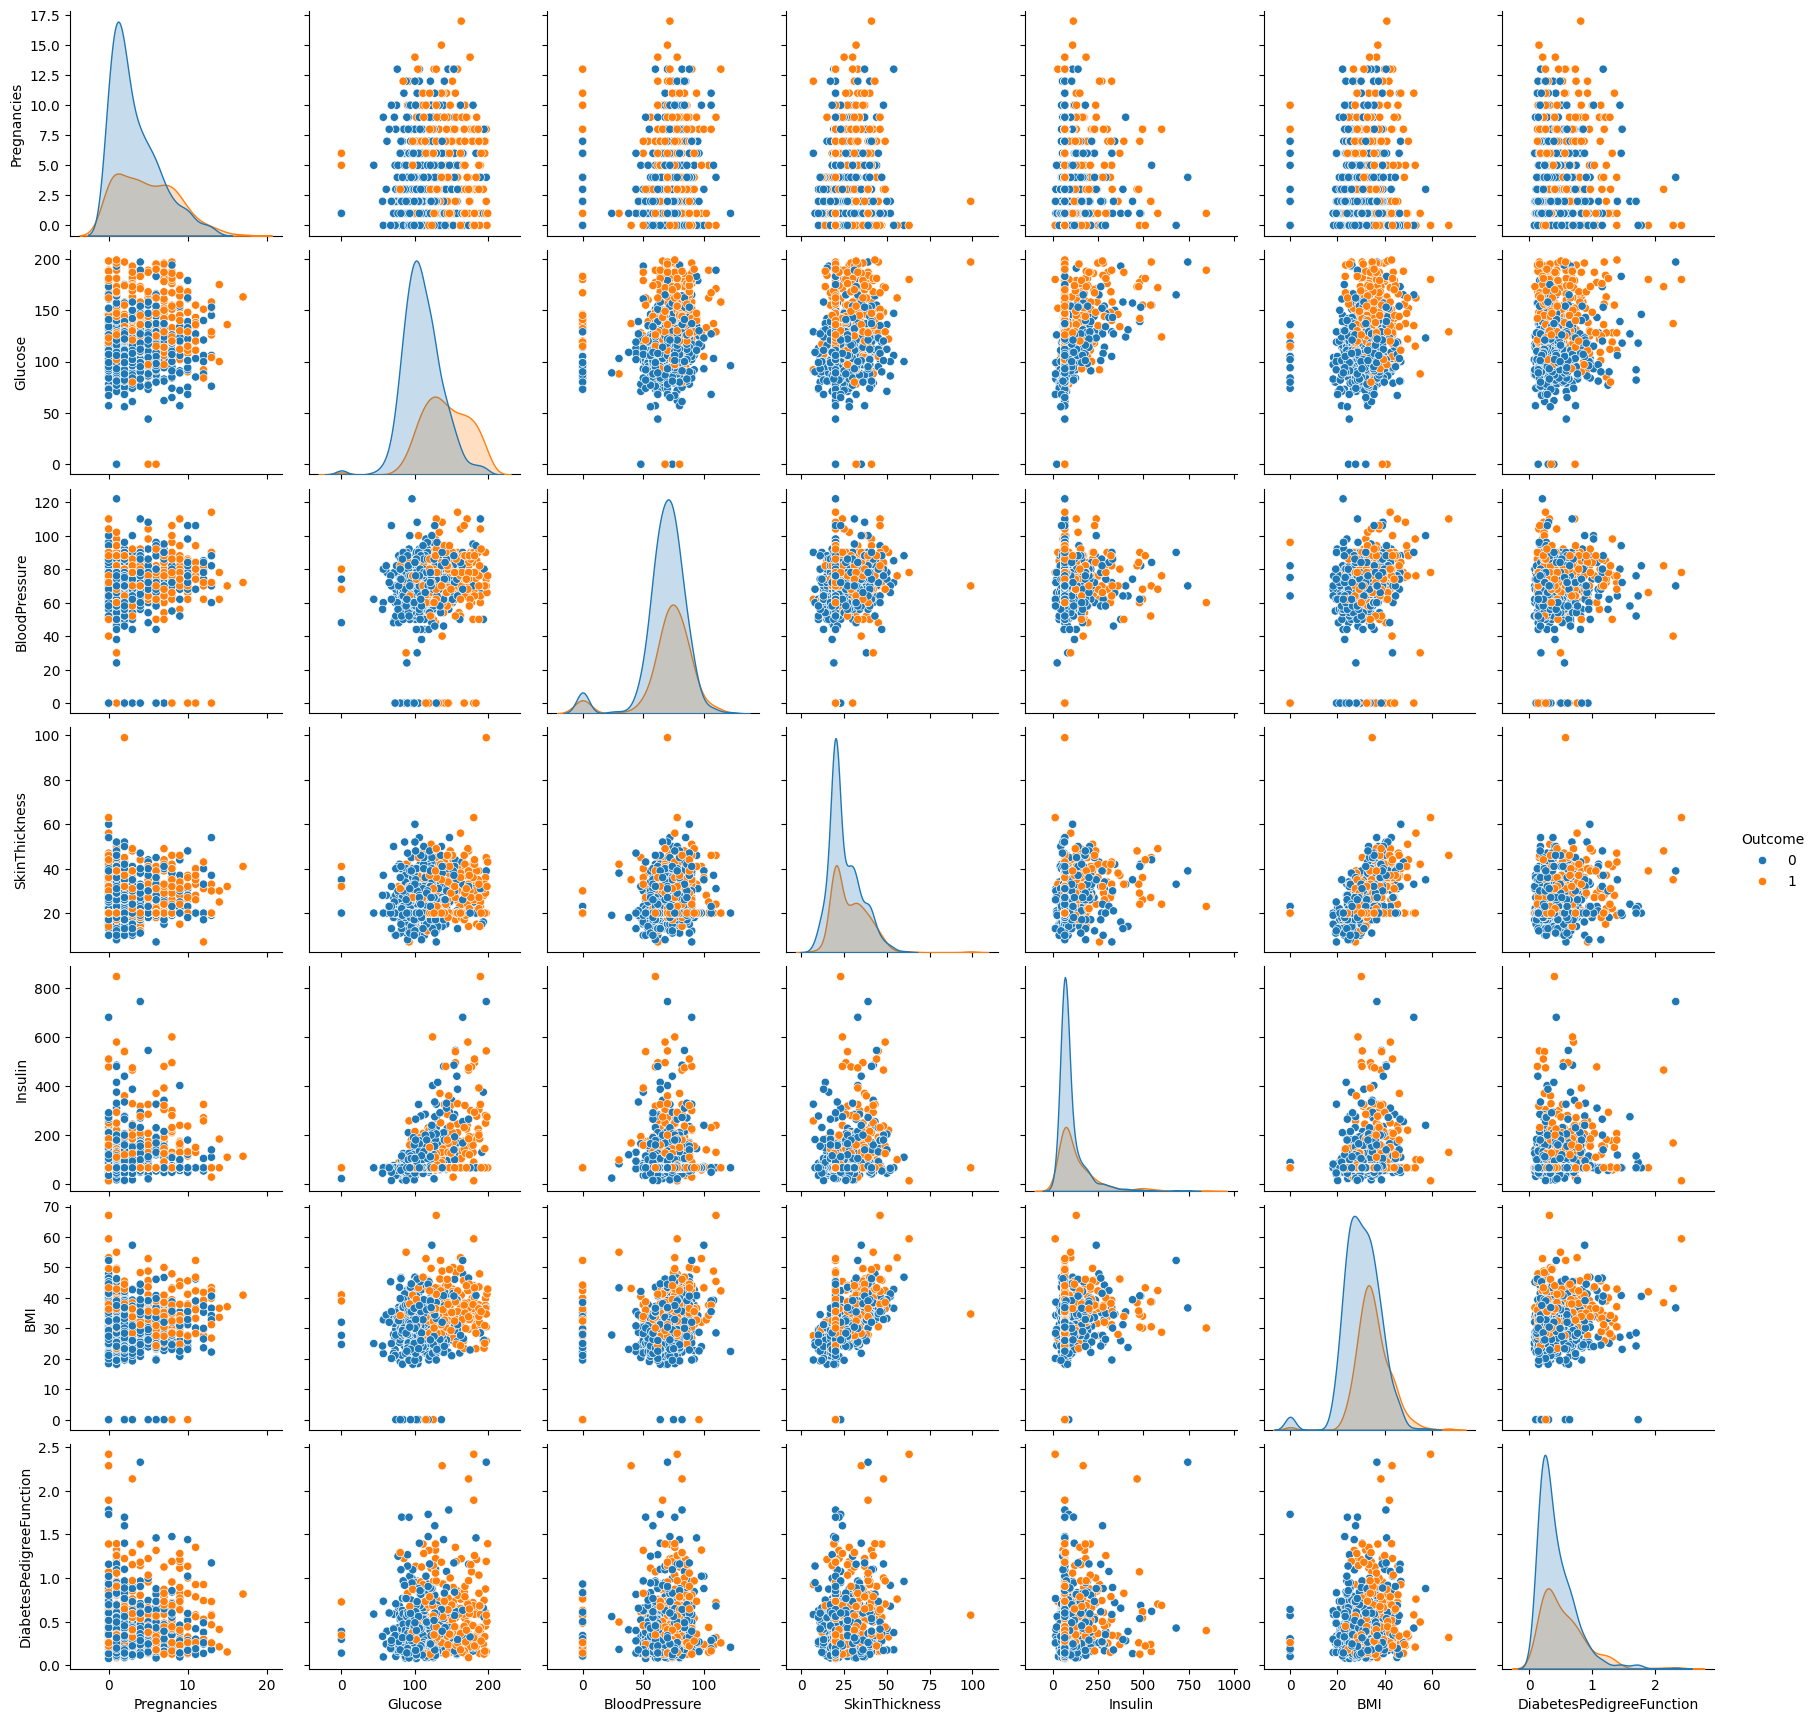

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Clone the repository containing the dataset
!git clone https://github.com/imharshitaa/Clinical-Decision-Support-System-Healthcare-EPICS-project.git

# Assuming the dataset file is in CSV format, you can use pandas to load it
di = pd.read_csv("Clinical-Decision-Support-System-Healthcare-EPICS-project/data/diabetes.csv")

# Drop the 'Index' column
di.drop(columns=['Age'], inplace=True)

# Replace NaN values with 0
di.fillna(0, inplace=True)

# Now you can work with the modified dataset
print(di.head())



di.head()
di.info()
di.describe()
di.isnull().sum()
di['Insulin'].value_counts()
di['SkinThickness'].value_counts().head()

sns.jointplot(x='Insulin',y='SkinThickness',data=di,kind='reg')

di.corr()

p=0
q=0
for i in range(len(di['Insulin'])):
    if di['Insulin'][i]==0 and di['SkinThickness'][i]!=0:
        p+=1
print(p)


p=int(di['Insulin'][di['Insulin']<400].mean())

di['SkinThickness'].replace(0,int(di['SkinThickness'].mean()),inplace=True)

di['Insulin'].replace(0,p,inplace=True)

di.head()

from sklearn.model_selection import train_test_split
xtr, xte, ytr, yte = train_test_split(di.drop('Outcome',axis=1),di['Outcome'],test_size=0.50)

ytr

from sklearn.linear_model import LogisticRegression

logmodel=LogisticRegression()
logmodel.fit(xtr,ytr)

predictions = logmodel.predict(xte)

from sklearn.metrics import confusion_matrix

accuracy = confusion_matrix(yte,predictions)
accuracy

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(yte,predictions)
accuracy

from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

clf.fit(xtr,ytr)

ypr=clf.predict(xte)

from sklearn import metrics
print('Accuracy  :',metrics.accuracy_score(yte,ypr))
sns.pairplot(hue='Outcome',kind='scatter',data=di)


